 ## `Environment Setup`
 Using the jupyter notebook in conda environment, install requirements via terminal
 ```py
 conda install --file requirements.txt
 ```

 ### Install Requirements
 Ensure that the requirements.txt file is present in the working folder.
 
 Note: that I am using a python 3.9.13 kernel in a conda environment.

In [3]:
%pip install -r requirements.txt #Install packages

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

### Load the library functions:

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# models to be used
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## `Data`
This dataset contains columns simulating credit bureau data. With multiple variables one would determine how favourable and individual is likely to secure a loan.
The data was downloaded from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

### Import Data

In [9]:
df1=pd.read_csv('credit_risk_dataset.csv')

# View top five entries
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
df1.shape

(32581, 12)

We have 32581 entries to develope a credit risk model.

To understand more about he data, use the info() function

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


We have 12 variable that will help in model development.

Let's understand the model better through summary statistics:

## `Descriptive statistics summary`

In [12]:
display(df1.describe(include='all'))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


### Clean Data
Since we have missing values, determine the frequency of missing values per variable:

In [13]:
percent_missing_df1= round(df1.isnull().sum()*100/len(df1),3)
missing_value_df1= pd.DataFrame({'Variable_Name' : df1.columns,
                                "Percentage_Missing" : percent_missing_df1})
missing_value_df1.sample(10)

,Variable_Name,Percentage_Missing
loan_amnt,loan_amnt,0.000
loan_status,loan_status,0.000
loan_grade,loan_grade,0.000
loan_intent,loan_intent,0.000
person_age,person_age,0.000
person_income,person_income,0.000
cb_person_default_on_file,cb_person_default_on_file,0.000
cb_person_cred_hist_length,cb_person_cred_hist_length,0.000
loan_int_rate,loan_int_rate,9.564
person_home_ownership,person_home_ownership,0.000


Resolve then to drop the entiries with the missing values seeing that they are less significant and won't affect the resust.

In [14]:
#Drop the null values
df1_dropped= df1.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Determine the frequncy of the loan grades.

Text(0.5, 1.0, 'Loan Grade Count')

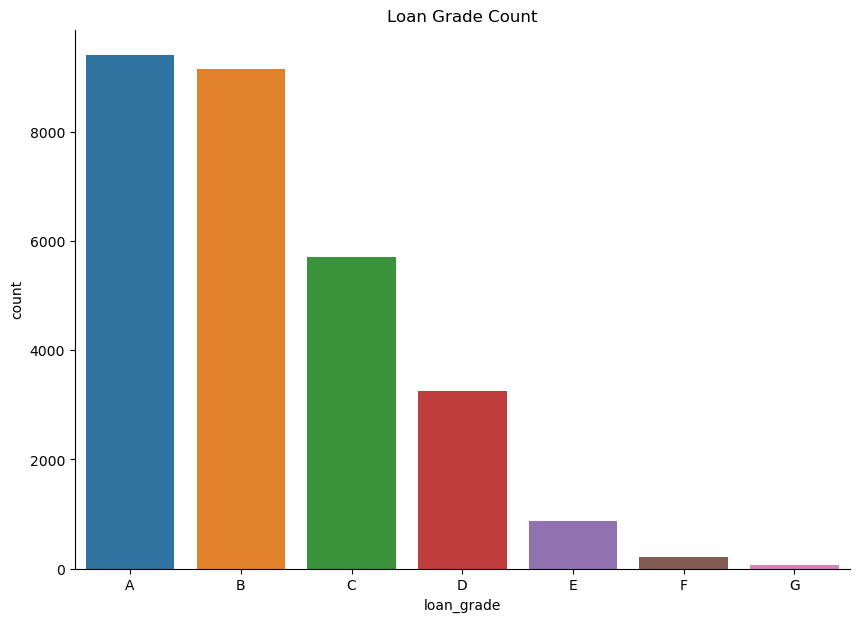

In [16]:
plt.figure(figsize = (10,7))
sns.countplot(x="loan_grade",
             data = df1_dropped,
             order=df1_dropped['loan_grade'].value_counts().index[0:10])
sns.despine()
plt.title('Loan Grade Count')

### What is the rate of defaulters to paid loans

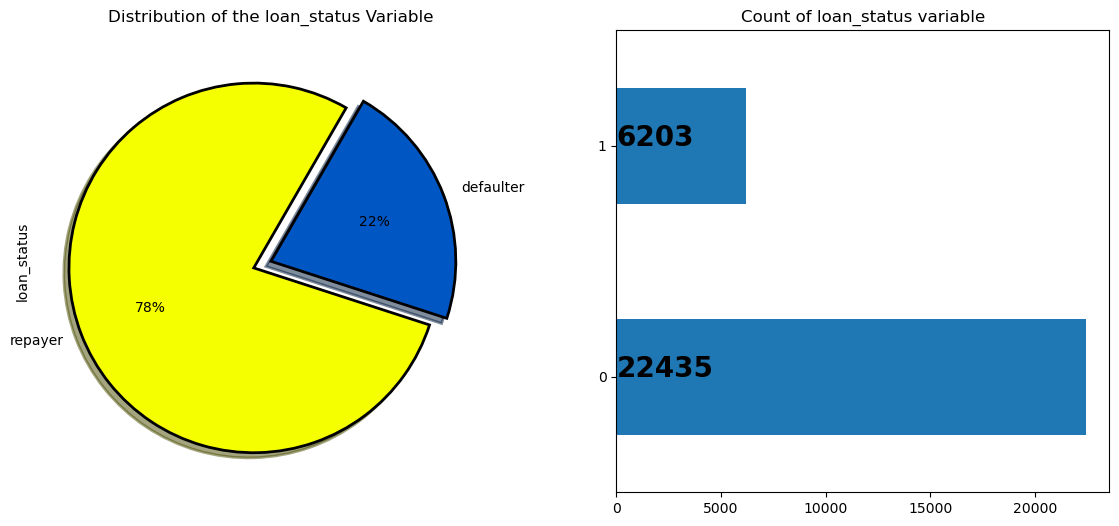

In [17]:
plt.figure(figsize =(14,6))
plt.subplot(121)
df1_dropped["loan_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                  colors = sns.color_palette("prism", 7),
                                                  startangle =60,
                                                  labels = ["repayer", "defaulter"],
                                                  wedgeprops = {"linewidth":2 , "edgecolor" : "k"},
                                                  explode = [.1,0],
                                                  shadow = True)
plt.title ("Distribution of the loan_status Variable")

plt.subplot(122)
ax=df1_dropped["loan_status"].value_counts().plot(kind = "barh")

for i,j in enumerate(df1_dropped["loan_status"].value_counts().values):
    ax.text(.7,i,j, weight = "bold" , fontsize =20)

plt.title("Count of loan_status variable")
#plt.savefig(".png")
plt.show()

### Correlation of variables to one another

<AxesSubplot:>

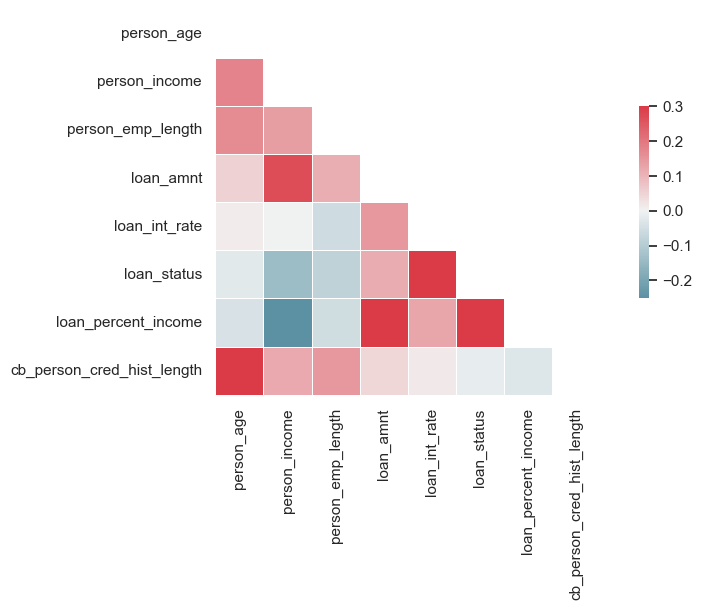

In [20]:
#Correlation Matrix
sns.set(style='white')

#compute the correlation matrix
corr = df1_dropped.corr()

#Generate a mask for teh upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up matplotlib figure
f , ax = plt.subplots(figsize = (10,5))

#Generating a custom diverging colormap
cmap=sns.diverging_palette(220,10, as_cmap=True)

#Draw the heatmap with a mask and the correct aspect ratio
sns.heatmap(corr, mask = mask , cmap= cmap, vmax =.3 , center = 0,
           square = True, linewidth = .5, cbar_kws = {"shrink": .5})

## `Model Development`
### Create dummies

In [21]:
cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
df1_dropped=pd.get_dummies(df1_dropped, columns=cols)

In [ ]:
df1_dropped.drop(columns =['person_age','loan_percent_income'], inplace = True)

### 1. `Logistic Regression`

In [22]:
X= df1_dropped.drop(columns = 'loan_status')
y= df1_dropped['loan_status']

In [23]:
#Split into training and validation sets
X_train,X_val, y_train, y_val = train_test_split(X,y,
                                                test_size = 0.2,
                                                random_state = 42,
                                                stratify =df1_dropped['loan_status'] )

In [24]:
#Lr Model
lr=LogisticRegression(C=10, max_iter=1000, n_jobs = -1 , random_state = 42)

In [25]:
#Train the Model
from sklearn.linear_model import LogisticRegression

lr.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, n_jobs=-1, random_state=42)

In [26]:
y_pred = lr.predict(X_val)

In [27]:
#Get the confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[4402   85]
 [1042  199]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4487
           1       0.70      0.16      0.26      1241

    accuracy                           0.80      5728
   macro avg       0.75      0.57      0.57      5728
weighted avg       0.79      0.80      0.75      5728

